# Universal Bank



### Step1.Data Preprocessing

In [1]:
import pandas as pd

In [2]:
loan = pd.read_csv(r'D:\Mitsu\MS-ISM\Q3\508 - Data Mining I\Week4\DataSet\UniversalBank2.csv')

In [3]:
loan.shape

(5000, 12)

In [4]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [5]:
loan['Personal Loan'].value_counts()

no     4520
yes     480
Name: Personal Loan, dtype: int64

In [6]:
#a = loan.iloc[:, 0:12]
X = pd.get_dummies(loan.iloc[:, 0:11], drop_first = True)
X

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Professional,Education_Undergrad,Securities Account_yes,CD Account_yes,Online_yes,CreditCard_yes
0,25,1,49,4,1.6,0,0,1,1,0,0,0
1,45,19,34,3,1.5,0,0,1,1,0,0,0
2,39,15,11,1,1.0,0,0,1,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,0,1,0,0,0,1,0
4996,30,4,15,4,0.4,85,0,1,0,0,1,0
4997,63,39,24,2,0.3,0,1,0,0,0,0,0
4998,65,40,49,3,0.5,0,0,0,0,0,1,0


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(loan['Personal Loan'].values)
y
#either above 3 lines or below 2 lines - both mean the same
# y = pd.get_dummies(loan.iloc[:, 11], drop_first = True)
# y

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_Professional,Education_Undergrad,Securities Account_yes,CD Account_yes,Online_yes,CreditCard_yes
4154,51,25,163,2,1.3,0,1,0,0,0,1,0
4820,42,17,44,1,0.3,0,1,0,1,1,1,1
1202,35,11,24,4,0.4,0,0,0,0,0,0,0
3759,31,4,29,4,1.5,121,0,0,0,0,1,1
622,41,17,92,2,1.9,131,0,1,0,0,1,0


### Step 2: Build a Decision Tree Model

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 1.000


### Step 3: Evaluate and interpret the Tree

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
y_pred = tree.predict(X_test)
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.982


In [16]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(tree, X_test, y_test)

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

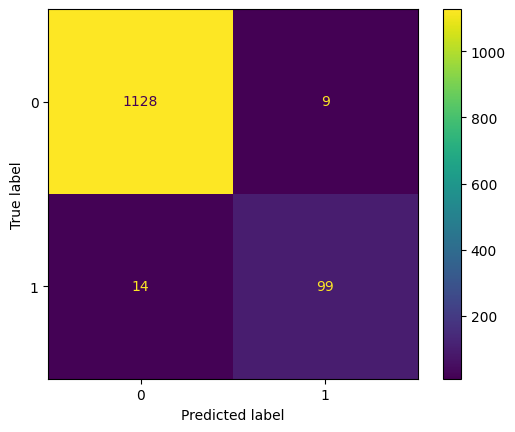

In [18]:
cm = confusion_matrix(y_pred, y_test, labels=tree.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
cm_disp.plot()

In [19]:
importance = pd.DataFrame(tree.feature_importances_, index=X.columns, columns=['Importance'])
importance

,Importance
Age,0.014981
Experience,0.011903
Income,0.447337
Family,0.130230
CCAvg,0.081564
Mortgage,0.006679
Education_Professional,0.003730
Education_Undergrad,0.280686
Securities Account_yes,0.000000
CD Account_yes,0.017300


In [20]:
loan_feature_names = X.columns.tolist()
loan_feature_names

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Mortgage',
 'Education_Professional',
 'Education_Undergrad',
 'Securities Account_yes',
 'CD Account_yes',
 'Online_yes',
 'CreditCard_yes']

In [21]:
from sklearn.tree import export_graphviz

In [22]:
#pip install graphviz

In [23]:
import graphviz

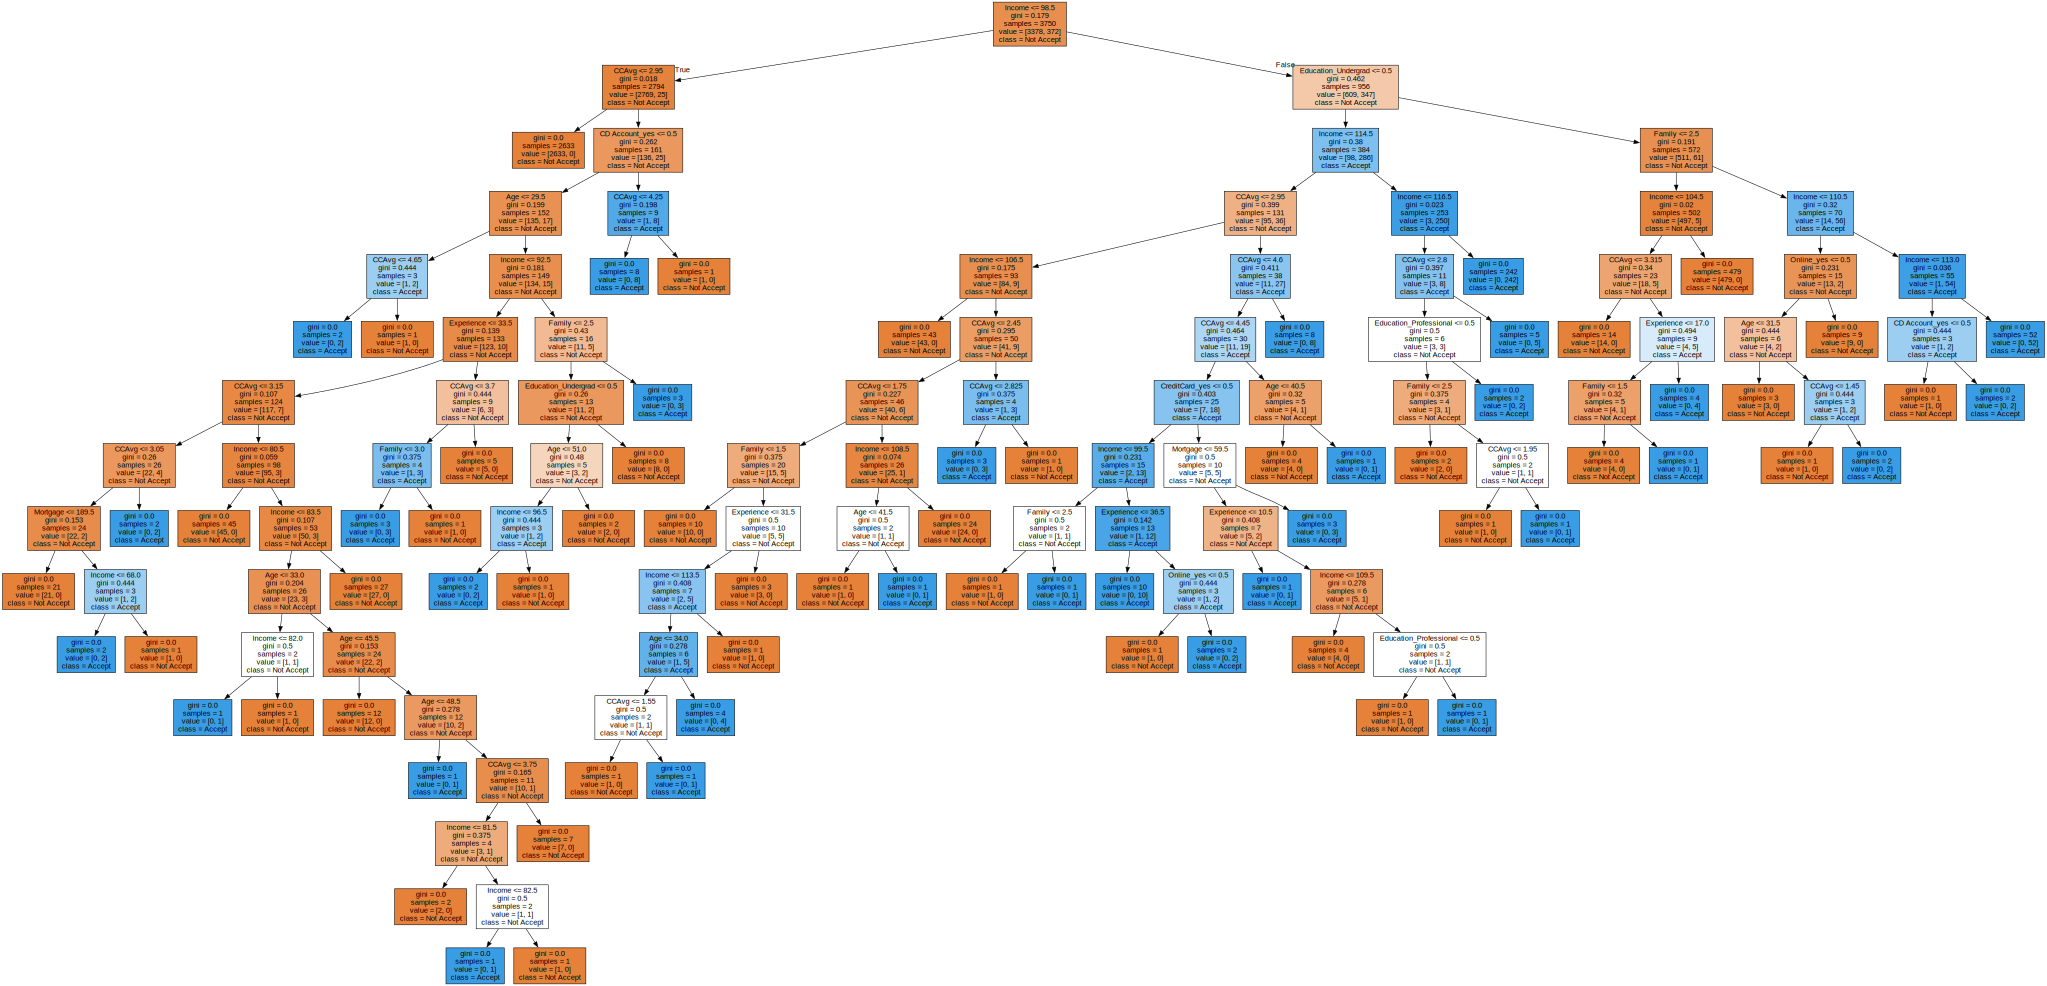

In [24]:
dot_data = export_graphviz(tree,class_names=[ "Not Accept","Accept"], feature_names=loan_feature_names,filled = True)
graph = graphviz.Source(dot_data, format= "png")
graph

In [25]:
import matplotlib.pyplot as plt

In [26]:
from sklearn import metrics

In [27]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

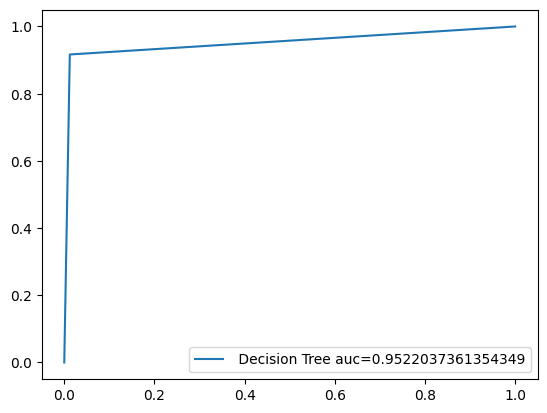

In [28]:
plt.plot(fpr,tpr,label=" Decision Tree auc="+str(auc))
plt.legend(loc=4)
plt.show()